<a href="https://colab.research.google.com/github/priyanshgupta1998/Natural-language-processing-NLP-/blob/master/NLTK_NLP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NLP Libraries
There are many open source Natural Language Processing (NLP) libraries. These are some of them:    

Natural language toolkit (NLTK)   
Apache OpenNLP      
Stanford NLP suite    
Gate NLP library   

In [0]:
import nltk

In [0]:
#This will show the NLTK downloader to choose what packages need to be installed. 
#You can install all packages since they all have small sizes with no problem. 
nltk.download() 

#1. Tokenize Text Using Pure Python
First, we will grab some web page content. . We will use the urllib module to crawl the web page:

In [0]:
import urllib.request
response = urllib.request.urlopen('http://php.net/')
html = response.read()
print(html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="https://www.php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="https://www.php.net/index.php">\n <link rel="shorturl" href="https://www.php.net/index">\n <link rel="alternate" href="https://www.php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" medi

`As you can see from the printed output, the result contains a lot of HTML tags that need to be cleaned. We can use BeautifulSoup to clean the grabbed text.`

In [0]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
text

"PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesErrorsExceptionsGeneratorsReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUsing Register GlobalsUser Submitted DataMagic QuotesHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsDealing with XFormsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsSafe ModeCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Specific 

`Now, we have clean text from the crawled web page.    `   
`Finally, let's convert that text into tokens by splitting the text like this:`

In [0]:
tokens = [t for t in text.split()] 
print(len(tokens))
tokens[:10]

3121


['PHP:',
 'Hypertext',
 'PreprocessorDownloadsDocumentationGet',
 'InvolvedHelpGetting',
 'StartedIntroductionA',
 'simple',
 'tutorialLanguage',
 'ReferenceBasic',
 'syntaxTypesVariablesConstantsExpressionsOperatorsControl',
 'StructuresFunctionsClasses']

#Count Word Frequency  
`The text is much better now. Let's calculate the frequency distribution of those tokens using Python NLTK. There is a function in NLTK called FreqDist() that does the job.`

In [0]:
freq = nltk.FreqDist(tokens) 
print(len(freq.items()))
list(freq.items())[:5]

455


[('PHP:', 1),
 ('Hypertext', 1),
 ('PreprocessorDownloadsDocumentationGet', 1),
 ('InvolvedHelpGetting', 1),
 ('StartedIntroductionA', 1)]

In [0]:
# for key,val in freq.items():
#     print (str(key) + ':' + str(val))

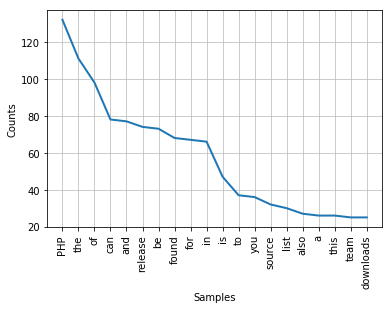

In [0]:
freq.plot(20, cumulative=False)

` There are some words like "the," "of," "a," "an," and so on. These words are stop words. Generally, stop words should be removed to prevent them from affecting our results.`

#Remove Stop Words Using NLTK    
`NLTK is shipped with stop words lists for most languages.`

In [43]:
from nltk.corpus import stopwords
nltk.download('stopwords')
print(len(stopwords.words('english')))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
179


`Now, let's modify our code and clean the tokens before plotting the graph. First, we will make a copy of the list. Then, we will iterate over the tokens and remove the stop words:`

In [0]:
clean_tokens = tokens[:]
sr = stopwords.words('english')
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
        
print(len(clean_tokens))

2242


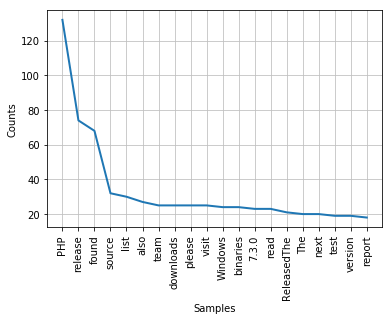

In [0]:
clean_freq = nltk.FreqDist(clean_tokens) 
clean_freq.plot(20,cumulative=False)

`Now, we will see how to tokenize the text using NLTK. Tokenizing text is important since text can't be processed without tokenization. Tokenization process means splitting bigger parts to small parts.`   

`You can tokenize paragraphs to sentences and tokenize sentences to words according to your needs. NLTK is shipped with a sentence tokenizer and a word tokenizer.`

In [44]:
from nltk.tokenize import sent_tokenize 
nltk.download('punkt')
mytext = "Hello Adam, how are you? I hope everything is going well. Today is a good day, see you dude." 
print(sent_tokenize(mytext))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['Hello Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']


In [0]:
from nltk.tokenize import word_tokenize
mytext = "Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
print(word_tokenize(mytext))

['Hello', 'Mr.', 'Adam', ',', 'how', 'are', 'you', '?', 'I', 'hope', 'everything', 'is', 'going', 'well', '.', 'Today', 'is', 'a', 'good', 'day', ',', 'see', 'you', 'dude', '.']


##Tokenize Non-English Languages Text

In [0]:
from nltk.tokenize import sent_tokenize
mytext = "Bonjour M. Adam, comment allez-vous? J'espère que tout va bien. Aujourd'hui est un bon jour."
print(sent_tokenize(mytext,"french"))

['Bonjour M. Adam, comment allez-vous?', "J'espère que tout va bien.", "Aujourd'hui est un bon jour."]


##WordNet
`WordNet is a database built for natural language processing. It includes groups of synonyms and a brief definition.`

In [0]:
from nltk.corpus import wordnet
nltk.download('wordnet')
syn = wordnet.synsets("pain")
print(syn[0].definition())
print(syn[0].examples())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
a symptom of some physical hurt or disorder
['the patient developed severe pain and distension']


In [0]:
syn = wordnet.synsets("happy")
print(syn[0].definition())
print(syn[0].examples())

enjoying or showing or marked by joy or pleasure
['a happy smile', 'spent many happy days on the beach', 'a happy marriage']


In [0]:
# WordNet includes a lot of definitions:
syn = wordnet.synsets("NLP")
print(syn[0].definition())
syn = wordnet.synsets("Python")
print(syn[0].definition())

the branch of information science that deals with natural language information
large Old World boas


####You can use WordNet to get synonymous words like this:

In [0]:
synonyms = []
for syn in wordnet.synsets('Computer'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
print(synonyms)

['computer', 'computing_machine', 'computing_device', 'data_processor', 'electronic_computer', 'information_processing_system', 'calculator', 'reckoner', 'figurer', 'estimator', 'computer']


In [0]:
wordnet.synsets('world')

[Synset('universe.n.01'),
 Synset('world.n.02'),
 Synset('world.n.03'),
 Synset('earth.n.01'),
 Synset('populace.n.01'),
 Synset('world.n.06'),
 Synset('worldly_concern.n.01'),
 Synset('world.n.08'),
 Synset('global.s.01')]

####Get Antonyms From WordNet

In [0]:
antonyms = []
for syn in wordnet.synsets("small"):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
print(antonyms)

['large', 'big', 'big']


#NLTK Word Stemming
`Word stemming means removing affixes from words and returning the root word. (The stem of the word working is work.)`    

`Search engines use this technique when indexing pages, so many people write different versions for the same word and all of them are stemmed to the root word.`

There are many algorithms for stemming, but the most used algorithm is the **Porter stemming algorithm** , **SnowballStemmer**.     
There are some other stemming algorithms, like the Lancaster stemming algorithm.

In [1]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer() 
print(stemmer.stem('working'))

work


#Stemming Non-English Words
SnowballStemmer can stem 13 languages besides the English language. The supported languages are:     `'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish'`

In [2]:
from nltk.stem import SnowballStemmer
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


In [4]:
from nltk.stem import SnowballStemmer
french_stemmer = SnowballStemmer('french')
print(french_stemmer.stem("Français"))

franc


#Lemmatizing Words Using WordNet
Word lemmatizing is similar to stemming, but the difference is the result of lemmatizing is a real word. Unlike stemming , we get original real word in lemmatizing.

In [19]:
#Stemming 
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer() 
print(stemmer.stem('increases'))

increas


In [20]:
#Lemmatizing
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('increases'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
increase


`Sometimes, if you try to lemmatize a word like the word playing, it will end up with the same word. This is because the default part of speech is nouns. To get verbs, you should specify it like this:`

In [21]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('playing', pos="v"))

play


The result could be a verb, noun, adjective, or adverb:

In [22]:
print(lemmatizer.lemmatize('playing', pos="n")) 
print(lemmatizer.lemmatize('playing', pos="a")) 
print(lemmatizer.lemmatize('playing', pos="r"))

playing
playing
playing


#### Stemming and Lemmatization Difference

In [23]:
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer() 
lemmatizer = WordNetLemmatizer() 
print(stemmer.stem('stones')) 
print(stemmer.stem('speaking')) 
print(stemmer.stem('bedroom')) 
print(stemmer.stem('jokes')) 
print(stemmer.stem('lisa')) 
print(stemmer.stem('purple')) 
print('----------------------') 
print(lemmatizer.lemmatize('stones')) 
print(lemmatizer.lemmatize('speaking'))
print(lemmatizer.lemmatize('bedroom'))
print(lemmatizer.lemmatize('jokes'))
print(lemmatizer.lemmatize('lisa'))
print(lemmatizer.lemmatize('purple'))

stone
speak
bedroom
joke
lisa
purpl
----------------------
stone
speaking
bedroom
joke
lisa
purple


`Stemming works on words without knowing their context, which is why it has lower accuracy and is faster than lemmatization.`

`In my opinion, lemmatizing is better than stemming. Word lemmatizing returns a real word even if it's not the same word; it could be a synonym, but at least it's a real word. Sometimes, you don't care about this level of accuracy, and all you need is speed. In this case, stemming is better.`

#Sentiment Analysis With NLP
`Sentiment analysis is one of the most common applications in natural language processing. With Sentiment analysis, we can decide what emotion a text is written.`

`With the widespread use of social media, the need to analyze the content that people share over social media is increasing day by day. Considering the volume of data coming through social media, it is quite difficult to do this with human power. Therefore, the need for applications that can quickly detect and respond to the positive or negative comments that people write is increasing day by day. `

###Dataset loading 
`This dataset was created with user reviews collected via 3 different websites (Amazon, Yelp, Imdb). These comments consist of restaurant, film and product reviews. Each record in the data set is labeled with two different emoticons. These are 1: Positive, 0: Negative.`

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip

--2019-05-29 09:03:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/x-httpd-php]
Saving to: ‘sentiment labelled sentences.zip’

sentiment labelled  100%[===================>]  82.21K   250KB/s    in 0.3s    

2019-05-29 09:03:33 (250 KB/s) - ‘sentiment labelled sentences.zip’ saved [84188/84188]



In [0]:
import zipfile
with zipfile.ZipFile('sentiment labelled sentences.zip', 'r') as zipObj:
    zipObj.extractall()
    
# file = "/content/sentiment labelled sentences/amazon_cells_labelled.txt"
# f = open(file, "r")
# for x in f:
#   print(x)

####Library upload

In [0]:
import pandas as pd
import numpy as np
import pickle
import sys
import os
import io
import re
from sys import path
import numpy as np
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from string import punctuation, digits
from IPython.core.display import display, HTML
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [0]:
#Amazon Data  (PRODUCTMENT SENTIMENT)
input_file = "sentiment labelled sentences/amazon_cells_labelled.txt"
amazon = pd.read_csv(input_file,delimiter='\t',header=None)
amazon.columns = ['Sentence','Class']

In [6]:
print(amazon.shape)
amazon.head()

(1000, 2)


,Sentence,Class
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [8]:
#Yelp Data   (HOTEL SENTIMENT)
input_file = "sentiment labelled sentences/yelp_labelled.txt"
yelp = pd.read_csv(input_file,delimiter='\t',header=None)
yelp.columns = ['Sentence','Class']
print(yelp.shape)
yelp.head()

(1000, 2)


,Sentence,Class
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [9]:
#Imdb Data  (MOVIE SENTIMENT)
input_file = "sentiment labelled sentences/imdb_labelled.txt"
imdb = pd.read_csv(input_file,delimiter='\t',header=None)
imdb.columns = ['Sentence','Class']
print(imdb.shape)
imdb.head()

(748, 2)


,Sentence,Class
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [10]:
#combine all data sets
data = pd.DataFrame()
data = pd.concat([amazon, yelp, imdb])
data['index'] = data.index
print(data.shape)
data.head()

(2748, 3)


,Sentence,Class,index
0,So there is no way for me to plug it in here i...,0,0
1,"Good case, Excellent value.",1,1
2,Great for the jawbone.,1,2
3,Tied to charger for conversations lasting more...,0,3
4,The mic is great.,1,4


In [31]:

grouped_df = data.groupby(by='Class', as_index=False)   #groupBy based on 'class' Column   #because class has only two values 0 and 1 .(easily classified)
grouped_df.count()
    
# for name_of_the_group, group in grouped_df:
#     print (name_of_the_group)
#     print (group)

,Class,Sentence,index
0,0,1362,1362
1,1,1386,1386


In [33]:
gb_index = grouped_df.agg({'index': pd.Series.nunique})   # 846 elements are unique out of 1362   # 827 elements are unique out of 1386
gb_index

,Class,index
0,0,846
1,1,827


In [39]:
gb_index.sort_values(by='index', ascending=True)

,Class,index
1,1,827
0,0,846


`Yes, we imported the data and viewed it. Now, let's look at the statistics about the data.`

In [11]:
#Total Count of Each Category
pd.set_option('display.width', 4000)
pd.set_option('display.max_rows', 1000)
distOfDetails = data.groupby(by='Class', as_index=False).agg({'index': pd.Series.nunique}).sort_values(by='index', ascending=False)
distOfDetails.columns =['Class', 'COUNT']
print(distOfDetails)

   Class  COUNT
0      0    846
1      1    827


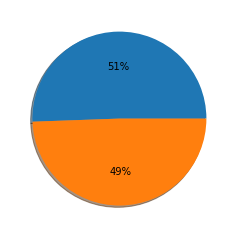

In [16]:
#Distribution of All Categories
plt.pie(distOfDetails['COUNT'],autopct='%1.0f%%',shadow=True, startangle=360)
plt.show()

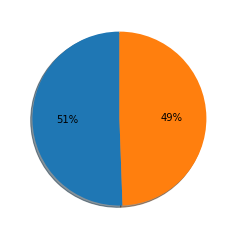

In [15]:
plt.pie(distOfDetails['COUNT'],autopct='%1.0f%%',shadow=True, startangle=90)
plt.show()

`As you can see, the data set is very balanced. There are almost equal numbers of positive and negative classes.`

In [0]:
#Text Preprocessing
columns = ['index','Class', 'Sentence']
df_ = pd.DataFrame(columns=columns)
#lower string
data['Sentence'] = data['Sentence'].str.lower()
#remove email adress
data['Sentence'] = data['Sentence'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+', '', regex=True)
#remove IP address
data['Sentence'] = data['Sentence'].replace('((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}', '', regex=True)


#remove punctaitions and special chracters
data['Sentence'] = data['Sentence'].str.replace('[^\w\s]','')


#remove numbers
data['Sentence'] = data['Sentence'].replace('\d', '', regex=True)

#remove stop words
for index, row in data.iterrows():
    word_tokens = word_tokenize(row['Sentence'])
    filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')]
    df_ = df_.append({"index": row['index'], "Class":  row['Class'],"Sentence": " ".join(filtered_sentence[0:])}, ignore_index=True)
data = df_

In [46]:
print(data.shape)
data.head()

(2748, 3)


,index,Class,Sentence
0,0,0,way plug us unless go converter
1,1,1,good case excellent value
2,2,1,great jawbone
3,3,0,tied charger conversations lasting minutesmajo...
4,4,1,mic great


`We made the pre-cleaning of the data ready for use within the model. Now, before we build our model, let's split our dataset to test (10%) and training(90%).`

In [49]:
X_train,X_test,y_train,y_test = train_test_split(data['Sentence'].values.astype('U'),
                                                 data['Class'].values.astype('int32'),
                                                 test_size=0.10, 
                                                 random_state=0)
classes  = data['Class'].unique()
classes

array([0, 1], dtype=object)

`Now we can create our model using our training data. In creating the model, I will use the **TF-IDF** as the vectorizer and                                
the **Stochastic Gradient Descent** algorithm as the classifier. We found these methods and the parameters in the method using grid search.`

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

In [0]:
#grid search result
vectorizer = TfidfVectorizer(analyzer='word',
                             ngram_range=(1,2),
                             max_features=50000,
                             max_df=0.5,
                             use_idf=True, norm='l2') 


counts = vectorizer.fit_transform(X_train)

vocab = vectorizer.vocabulary_
classifier = SGDClassifier(alpha=1e-05,max_iter=50,penalty='elasticnet')
targets = y_train
classifier = classifier.fit(counts, targets)
example_counts = vectorizer.transform(X_test)
predictions = classifier.predict(example_counts)

`Let's examine the accuracy, precision, recall and f1 results.`

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [53]:
#Model Evaluation
acc = accuracy_score(y_test, predictions, normalize=True)
hit = precision_score(y_test, predictions, average=None,labels=classes)
capture = recall_score(y_test, predictions, average=None,labels=classes)
print('Model Accuracy:%.2f'%acc)
print(classification_report(y_test, predictions))

Model Accuracy:0.79
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       139
           1       0.80      0.76      0.78       136

    accuracy                           0.79       275
   macro avg       0.79      0.79      0.79       275
weighted avg       0.79      0.79      0.79       275



`As we have seen, the success of our model was 79%. Now let's look at the confusion matrix, where we can see more clearly how accurate our estimates are.`

In [0]:
#source: https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print()
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure(figsize=(150,100))

In [56]:
# Compute confusion matrix   (check the performance of the model)
cnf_matrix = confusion_matrix(y_test, predictions,classes)
cnf_matrix

array([[113,  26],
       [ 32, 104]])

In [57]:
np.set_printoptions(precision=2)
class_names = range(1,classes.size+1)
class_names

range(1, 3)

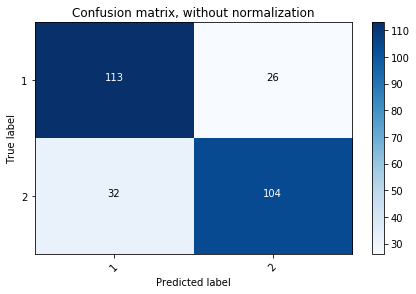

<Figure size 10800x7200 with 0 Axes>

In [59]:


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
classInfo = pd.DataFrame(data=[])
for i in range(0,classes.size):
    classInfo = classInfo.append([[classes[i],i+1]],ignore_index=True)
classInfo.columns=['Category','Index']


In [60]:
classInfo

,Category,Index
0,0,1
1,1,2


#Pandas  groupBy()  property

In [20]:
import pandas as pd
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three', 'three', 'one'], 'B': range(6)})
print(df)

       A  B
0    one  0
1    one  1
2    two  2
3  three  3
4  three  4
5    one  5


In [22]:
grouped_df = df.groupby('A')

for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")

     A  B
0  one  0
1  one  1
5  one  5 


       A  B
3  three  3
4  three  4 


     A  B
2  two  2 




In [25]:
gb = df.groupby("A")
gb.count()

,B
A,
one,3
three,2
two,1


In [27]:
for name_of_the_group, group in gb:
    print (name_of_the_group)
    print (group)

one
     A  B
0  one  0
1  one  1
5  one  5
three
       A  B
3  three  3
4  three  4
two
     A  B
2  two  2
